In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
traincsv = pd.read_csv("data/train.csv")
traincsv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housedata = pd.DataFrame(traincsv[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [9]:
housedata.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

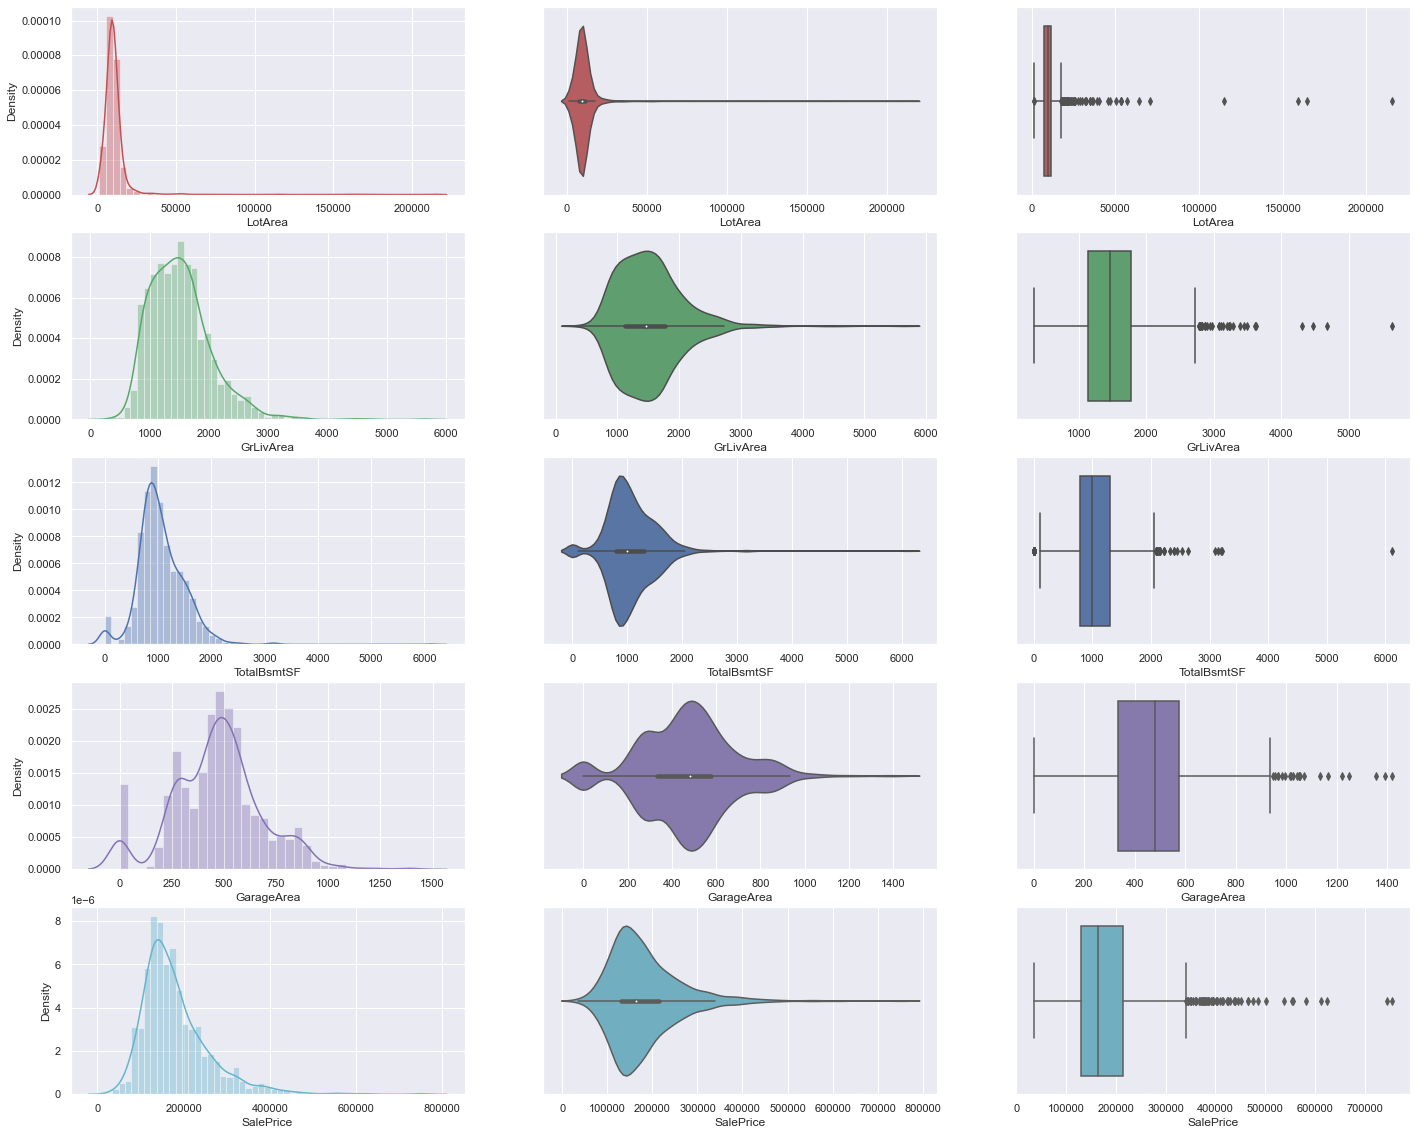

In [18]:
f, axes = plt.subplots(5,3,figsize=(24,20))
colors = ["r",'g','b','m','c']
count = 0
for i in housedata:
    sb.distplot(housedata[i],color = colors[count],ax = axes[count,0])
    sb.violinplot(housedata[i],color = colors[count],orient='h',ax = axes[count,1])
    sb.boxplot(housedata[i],color = colors[count],orient='h',ax =axes[count,2])
    count += 1

In [19]:
print("LotArea Skew: ",housedata['LotArea'].skew())
print("GrLivArea Skew: ",housedata['GrLivArea'].skew())
print("TotalBsmtSF Skew: ",housedata['TotalBsmtSF'].skew())
print("GarageArea Skew: ",housedata['GarageArea'].skew())
print("SalePrice Skew: ",housedata['SalePrice'].skew())

LotArea Skew:  12.207687851233496
GrLivArea Skew:  1.3665603560164552
TotalBsmtSF Skew:  1.5242545490627664
GarageArea Skew:  0.17998090674623907
SalePrice Skew:  1.8828757597682129


In [20]:
print(housedata.corr())

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

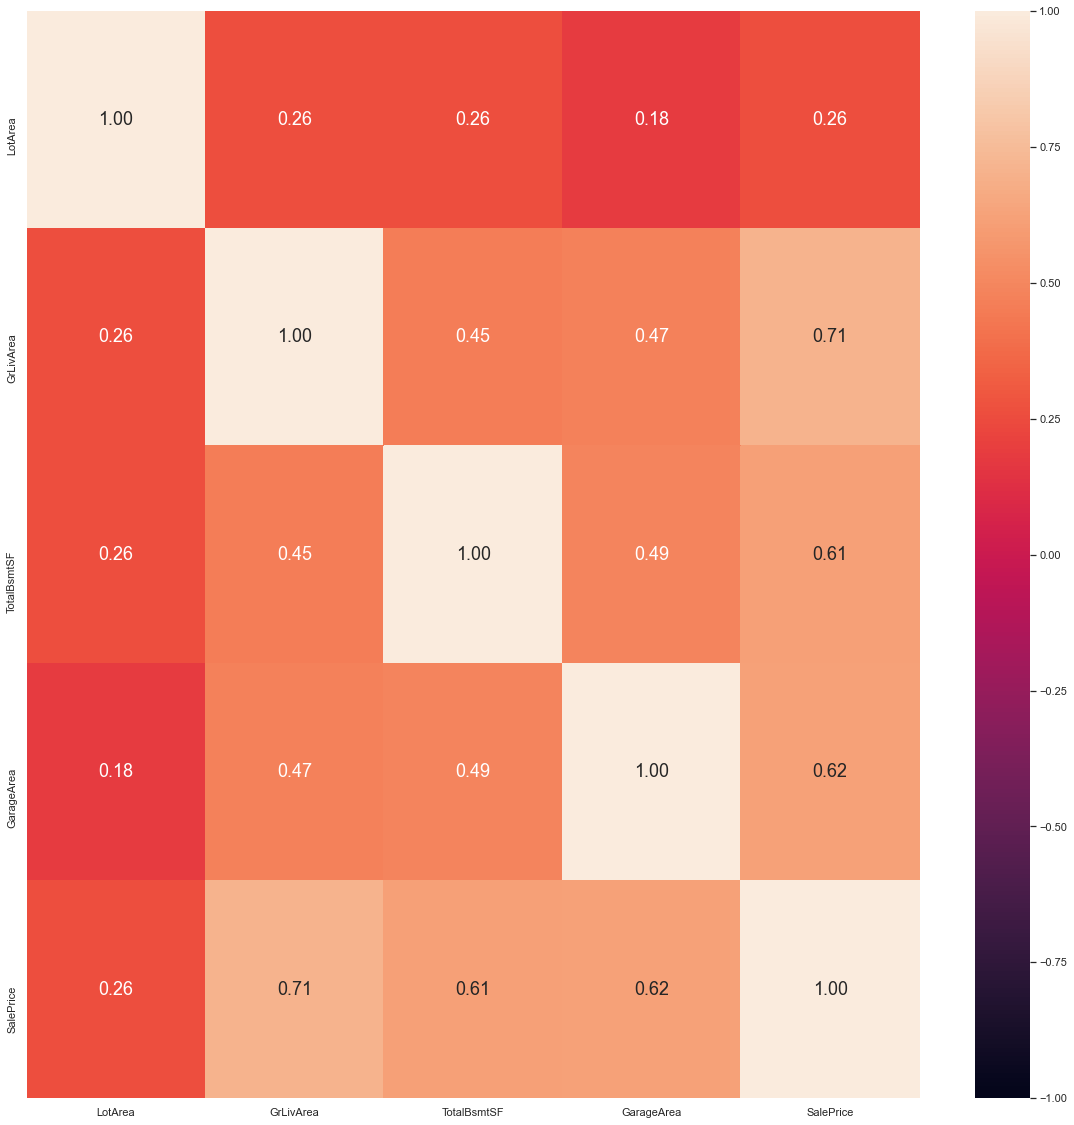

In [28]:
f,axes = plt.subplots(1,figsize=(20,20))
sb.heatmap(housedata.corr(),vmin = -1,vmax = 1,annot = True,annot_kws = {"size":18},fmt =".2f")

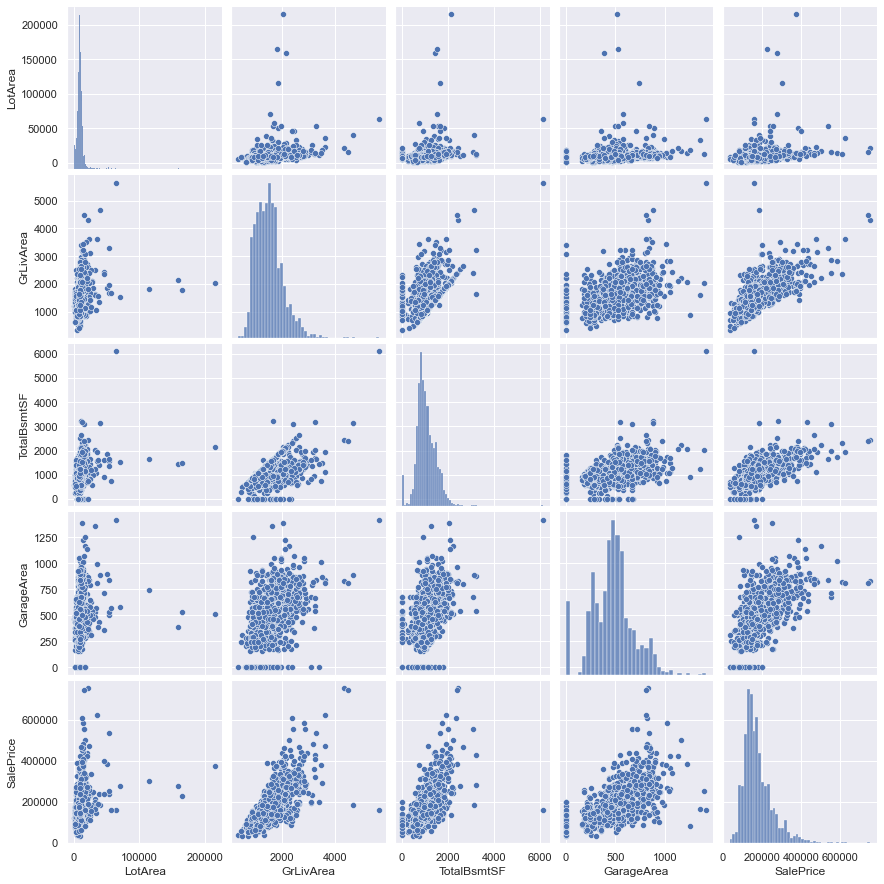

In [29]:
sb.pairplot(housedata)

**Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `GrLivArea` : Possibly the most important variable : Highest Correlation, Strong Linearity    
> `GarageArea` and `TotalBsmtSF` : Important variables : High Correlation, Strong Linearity    
> `LotArea` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation


In [31]:
catdata = pd.DataFrame(traincsv[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [35]:
print(catdata.dtypes)

MSSubClass       int64
Neighborhood    object
BldgType        object
OverallQual      int64
dtype: object


In [36]:
catdata["MSSubClass"] = catdata["MSSubClass"].astype("category")
catdata["Neighborhood"] = catdata["Neighborhood"].astype("category")
catdata["BldgType"] = catdata["BldgType"].astype("category")
catdata["OverallQual"] = catdata["OverallQual"].astype("category")

In [37]:
print(catdata.dtypes)

MSSubClass      category
Neighborhood    category
BldgType        category
OverallQual     category
dtype: object


In [38]:
catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 8.0 KB


In [45]:
catdata.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


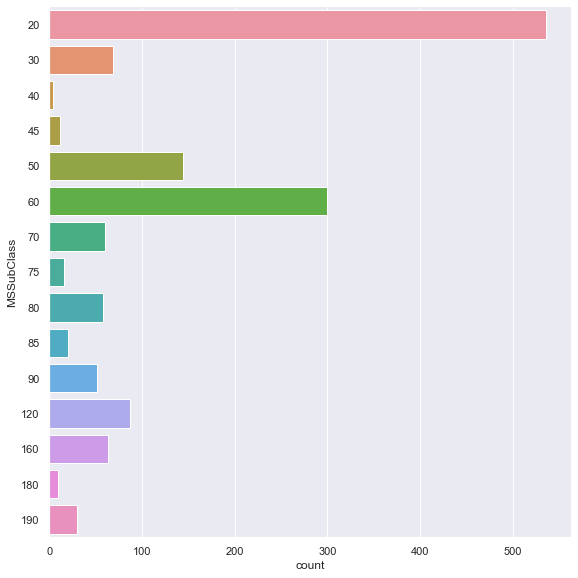

In [47]:
sb.catplot(y = "MSSubClass",data = catdata,kind = "count",height = 8)

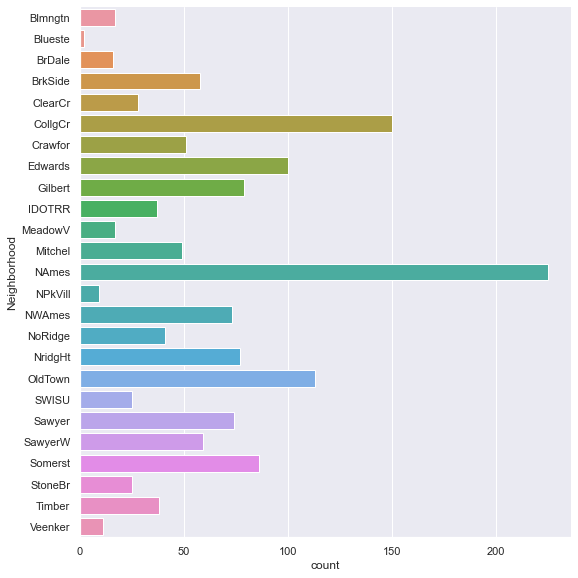

In [48]:
sb.catplot(y = "Neighborhood",data = catdata,kind = "count",height = 8)

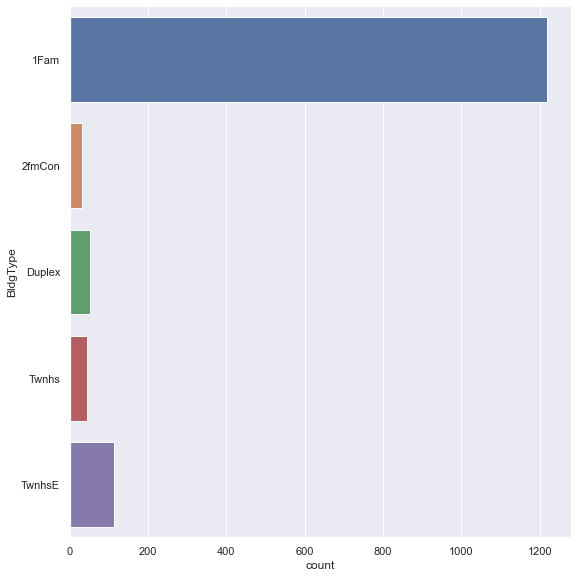

In [49]:
sb.catplot(y = "BldgType",data = catdata,kind = "count",height = 8)

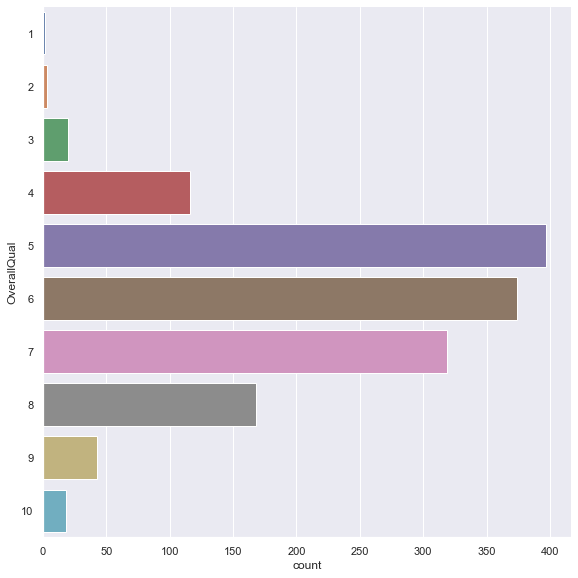

In [50]:
sb.catplot(y = "OverallQual",data = catdata,kind = "count",height = 8)

<AxesSubplot:xlabel='MSSubClass', ylabel='OverallQual'>

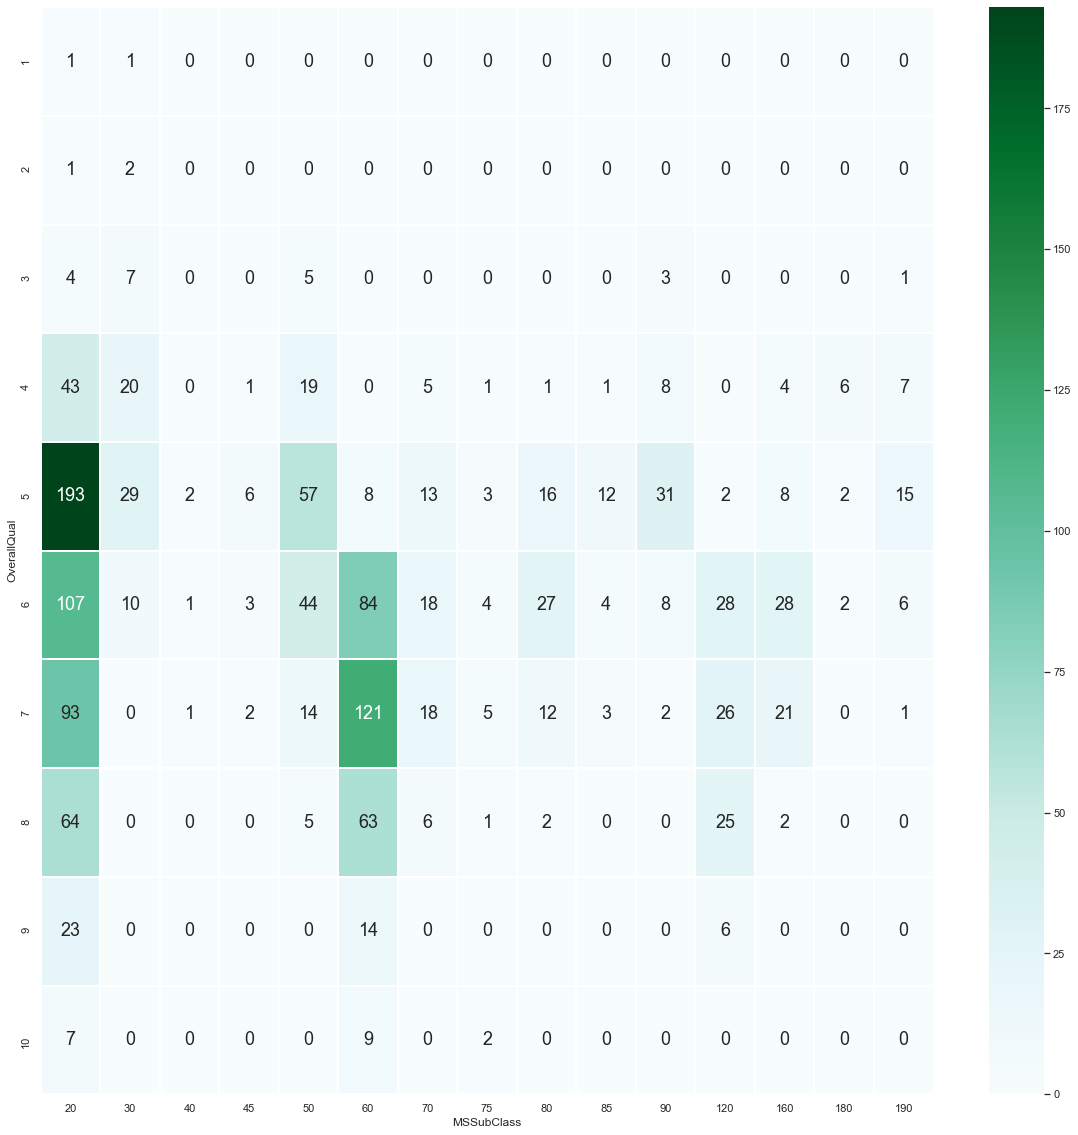

In [69]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(catdata.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18},fmt = "g",cmap = "BuGn")

<AxesSubplot:xlabel='OverallQual', ylabel='Neighborhood'>

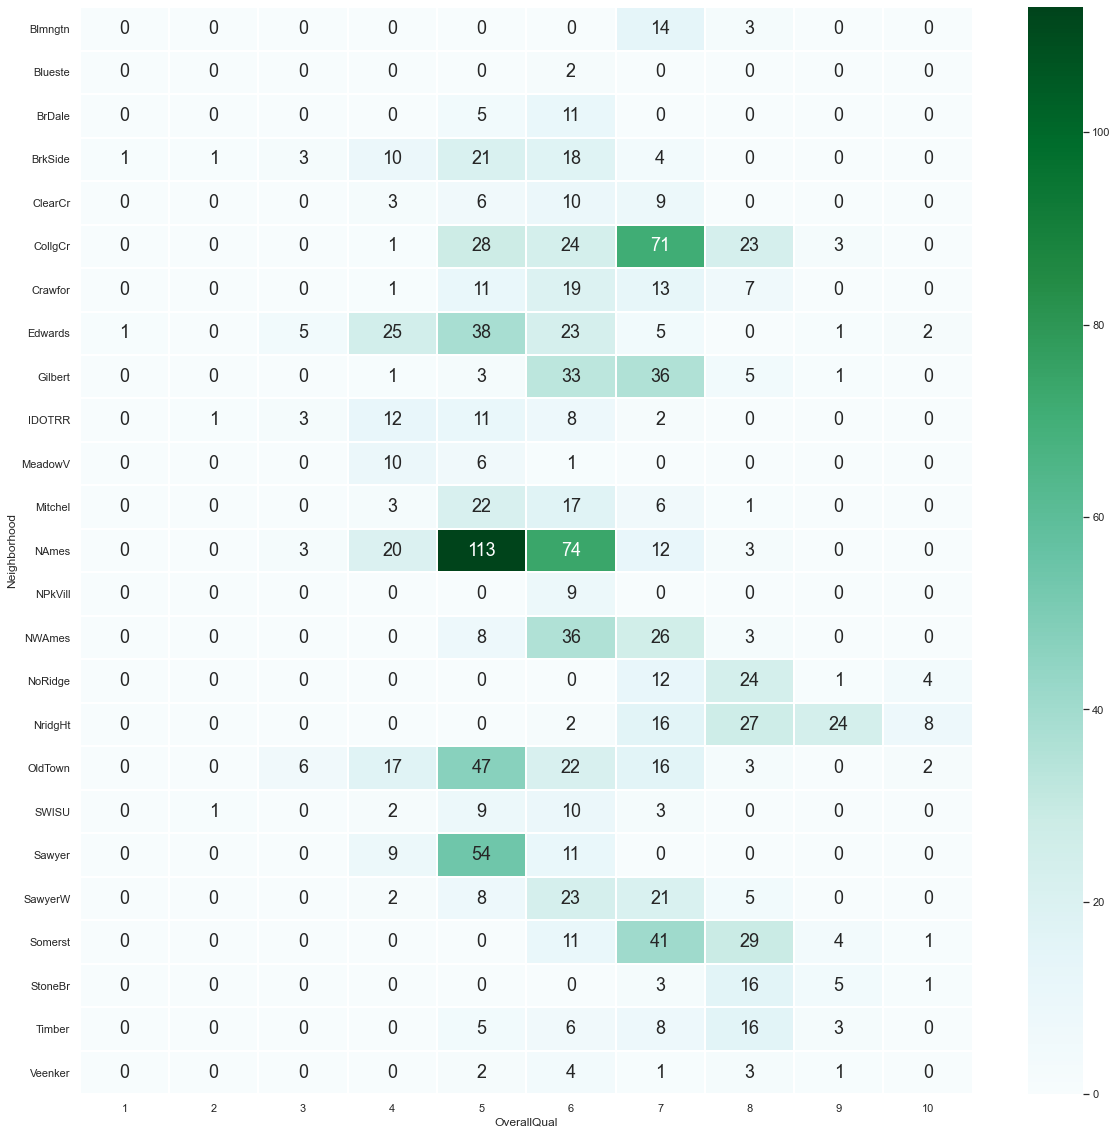

In [66]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(catdata.groupby(['Neighborhood', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18},fmt = "g",cmap = "BuGn")

<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

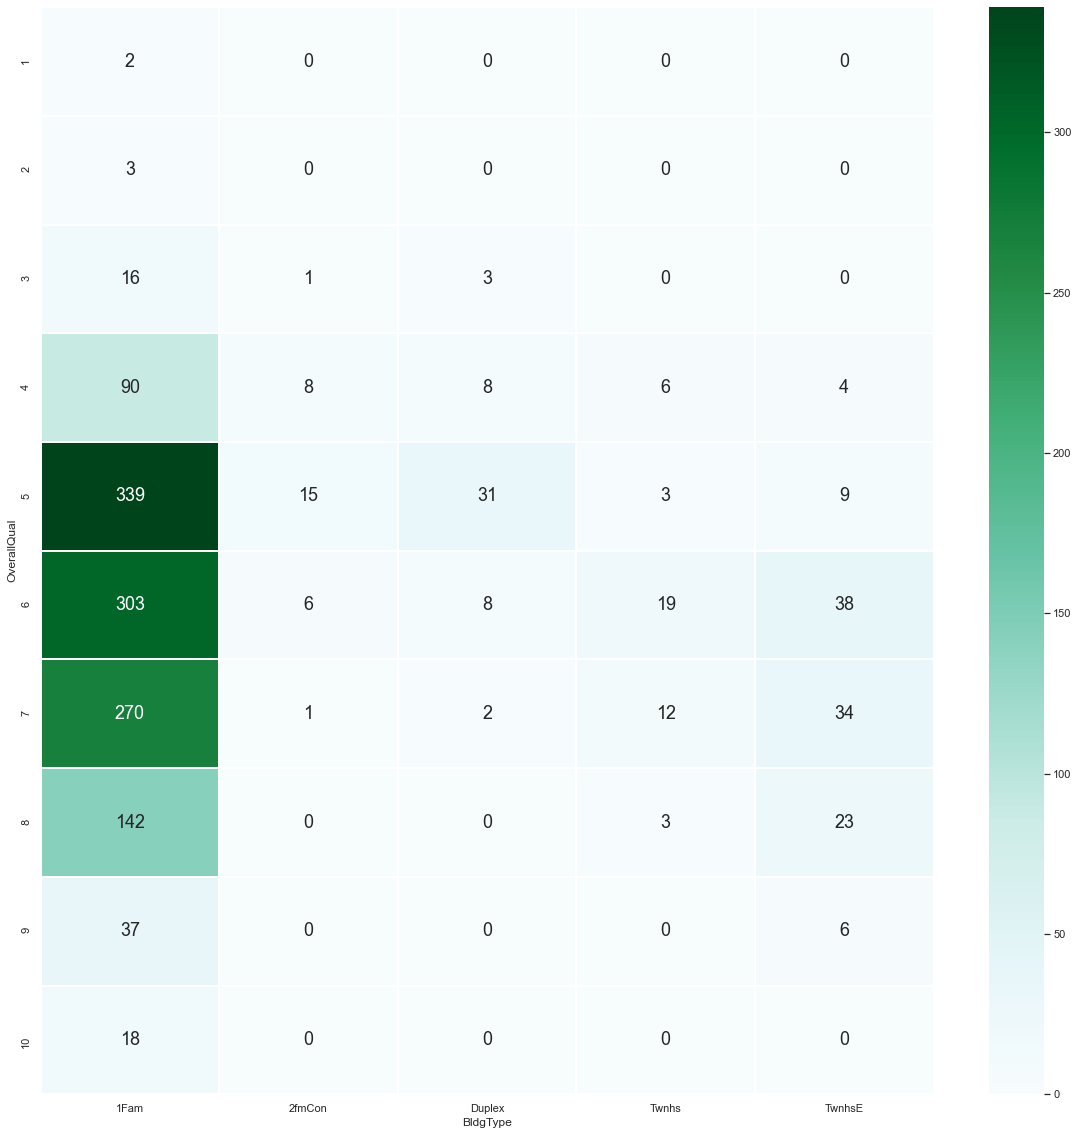

In [68]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(catdata.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18},fmt = "g",cmap = "BuGn")

In [72]:
saleprice = pd.DataFrame(housedata["SalePrice"])
housecatsale = pd.concat([catdata,saleprice],axis=1)
housecatsale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

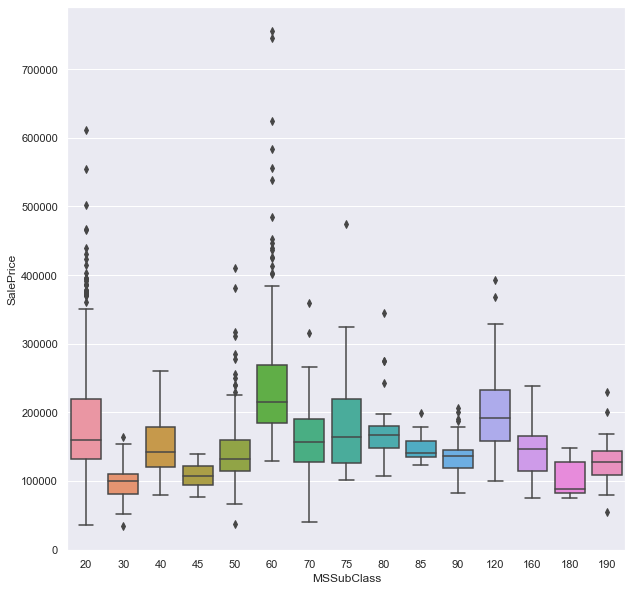

In [80]:
f,axes = plt.subplots(1,1,figsize = (10,10))
sb.boxplot(x = "MSSubClass",y="SalePrice",data = housecatsale)

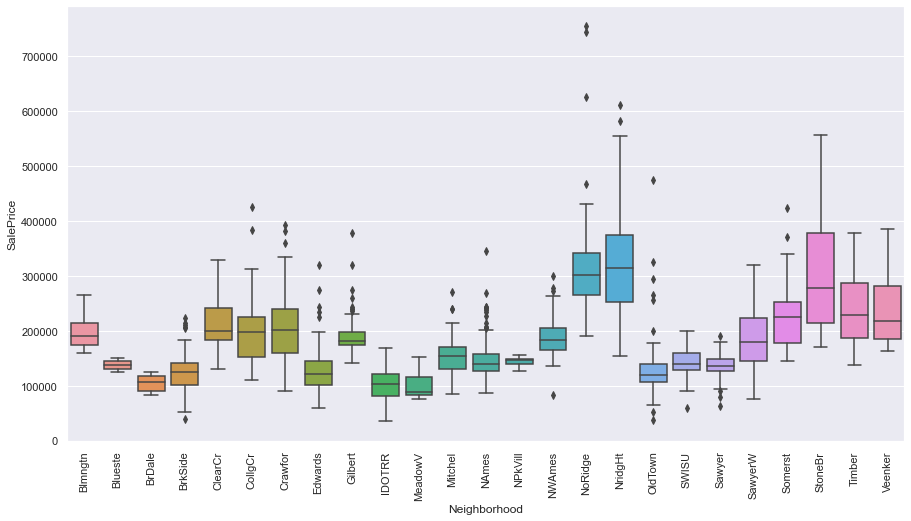

In [86]:
f,axes = plt.subplots(1,1,figsize = (15,8))
sb.boxplot(x = "Neighborhood",y="SalePrice",data = housecatsale)
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

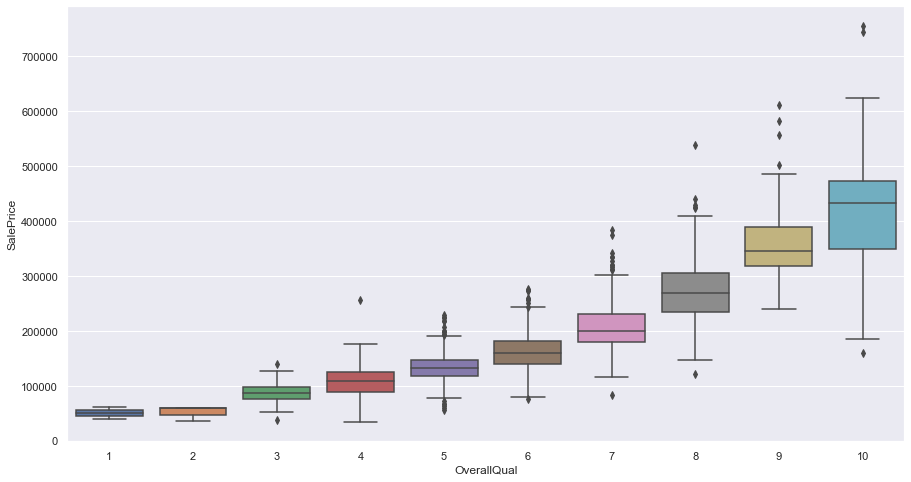

In [89]:
f,axes = plt.subplots(1,1,figsize = (15,8))
sb.boxplot(x = "OverallQual",y="SalePrice",data = housecatsale)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

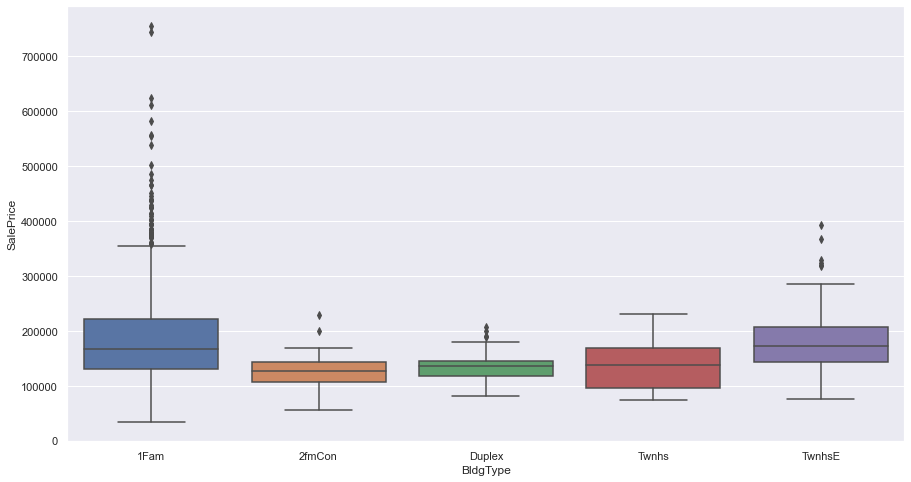

In [90]:
f,axes = plt.subplots(1,1,figsize = (15,8))
sb.boxplot(x = "BldgType",y="SalePrice",data = housecatsale)

**Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` across the levels   
> `Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` across levels   
> `BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` across the levels   
